In [71]:
import pandas as pd
import matplotlib.pyplot as plt

ward = pd.read_pickle('CSV/ward.p')
ward.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [9]:
census = pd.read_pickle('CSV/census.p')
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


## One-to-one relationship

In [54]:
ward_census = ward.merge(census,on='ward',suffixes=('_ward','_cen'))

print(ward_census.shape,ward.shape,census.shape)
ward_census.head()

(50, 9) (50, 4) (50, 6)


In [55]:
ward_census = census.merge(ward,on='ward',suffixes=('_ward','_cen'))

print(ward_census.shape,ward.shape,census.shape)
ward_census.head()

(50, 9) (50, 4) (50, 6)


In [63]:
license = pd.read_pickle('CSV/licenses.p')
#print(license[license.ward == '1'])
license.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [64]:
ward_licenses = ward.merge(license, on='ward',suffixes=('_ward','_lic'))
print(ward.shape,license.shape,ward_licenses.shape) #one-to-many relationship
ward_licenses.head(5)

(50, 4) (10000, 6) (10000, 9)


,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [12]:
owners = pd.read_pickle('CSV/business_owners.p')
owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [53]:
licenses_owners = license.merge(owners,on='account')
print(licenses_owners.shape)

counted_df = licenses_owners.groupby('title').agg({'account':'count'})
print(owners.shape,license.shape)
sorted_df = counted_df.sort_values('account',ascending=False)

print(sorted_df.head())
licenses_owners.head()

(19497, 9)
(21352, 4) (10000, 6)
                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


## Merging multiple tables

<AxesSubplot:xlabel='ward'>

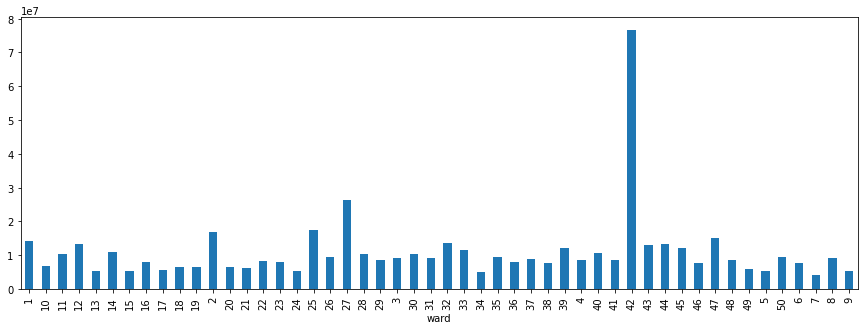

In [75]:
plt.figure(figsize=(15,5))
multi_tables = ward.merge(census, on='ward').merge(license, on='ward')
multi_tables.groupby('ward').pop_2010.sum().plot(kind='bar')

In [11]:
demo = pd.read_pickle('CSV/zip_demo.p')
demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [79]:
licenses_zip_ward = license.merge(demo,on='zip') \
            			.merge(ward,on='ward')

print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}).sort_values('income',ascending=False).head())

                  income
alderman                
Brendan Reilly    110215
William D. Burns  107811
Michelle Smith    100116
Tom Tunney         88708
Brian Hopkins      87143


In [82]:
land_cen_lic = land.merge(census, on='ward') \
                    .merge(license, on='ward', suffixes=('_cen','_lic'))
#print(land_cen_lic.head())
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


## Left Join

In [86]:
veh_owners = vehicles.merge(taxi_owners, on='vid', how='left')
print(vehicles.shape,taxi_owners.shape,veh_owners.shape)
veh_owners1 = veh_owners.drop('owner_y',axis=1)
veh_owners1.head()

(3519, 6) (3519, 5) (3519, 10)


,vid,make,model,year,fuel_type,owner_x,rid,address,zip
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI,T2767,510 W. BELMONT AVE.,60657
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.,T1411,3351 W. ADDISON ST.,60618
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP,T6500,2945 W. PETERSON AVE.,60659
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC",T2746,4020 W. GLENLAKE AVE.,60646
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO,T5922,6550 N. CLARK ST.,60626


A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table.

In [13]:
land = pd.read_pickle('CSV/land_use.p')
land.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [25]:
taxi_own_veh = taxi_owners.merge(vehicles, on='vid', suffixes=('_own','_veh'))

print(taxi_own_veh['fuel_type'].value_counts())
taxi_own_veh.head()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [22]:
vehicles = pd.read_pickle('CSV/taxi_vehicles.p')
vehicles.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [15]:
taxi_owners = pd.read_pickle('CSV/taxi_owners.p')
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


## Self join


Merging a table to itself can be useful when you want to compare values in a column to other values in the same column

In [92]:
veh_owners.head()

,vid,make,model,year,fuel_type,owner_x,rid,owner_y,address,zip
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI,T2767,SEYED M. BADRI,510 W. BELMONT AVE.,60657
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.,T1411,DESZY CORP.,3351 W. ADDISON ST.,60618
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP,T6500,AGAPH CAB CORP,2945 W. PETERSON AVE.,60659
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC",T2746,"MIDWEST CAB CO, INC",4020 W. GLENLAKE AVE.,60646
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO,T5922,SUMETTI CAB CO,6550 N. CLARK ST.,60626


In [103]:
new = veh_owners.merge(veh_owners, on='vid', how='left')
new.head()

,vid,make_x,model_x,year_x,fuel_type_x,owner_x_x,rid_x,owner_y_x,address_x,zip_x,make_y,model_y,year_y,fuel_type_y,owner_x_y,rid_y,owner_y_y,address_y,zip_y
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI,T2767,SEYED M. BADRI,510 W. BELMONT AVE.,60657,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI,T2767,SEYED M. BADRI,510 W. BELMONT AVE.,60657
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.,T1411,DESZY CORP.,3351 W. ADDISON ST.,60618,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.,T1411,DESZY CORP.,3351 W. ADDISON ST.,60618
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP,T6500,AGAPH CAB CORP,2945 W. PETERSON AVE.,60659,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP,T6500,AGAPH CAB CORP,2945 W. PETERSON AVE.,60659
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC",T2746,"MIDWEST CAB CO, INC",4020 W. GLENLAKE AVE.,60646,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC",T2746,"MIDWEST CAB CO, INC",4020 W. GLENLAKE AVE.,60646
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO,T5922,SUMETTI CAB CO,6550 N. CLARK ST.,60626,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO,T5922,SUMETTI CAB CO,6550 N. CLARK ST.,60626


## Semi join

 It first merges the tables, then searches it for which rows belong in the final result creating a filter and subsets the left table with that filter.